In [1]:
import math
import librosa
import scipy
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
np.set_printoptions(threshold=np.inf)

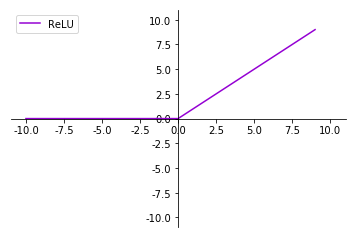

In [2]:
fig =  plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
x = np.arange(-10,10)
y = np.where(x<0,0,x) # 小于0输出0，大于0输出y
plt.xlim(-11,11)
plt.ylim(-11,11)

ax = plt.gca() # 获得当前axis坐标轴对象
ax.spines['right'].set_color('none') # 去除右边界线
ax.spines['top'].set_color('none') # 去除上边界线

ax.xaxis.set_ticks_position('bottom') # 指定下边的边作为x轴
ax.yaxis.set_ticks_position('left') # 指定左边的边为y轴

ax.spines['bottom'].set_position(('data',0)) # 指定data 设置的bottom（也就是指定的x轴）绑定到y轴的0这个点上
ax.spines['left'].set_position(('data',0))  # 指定y轴绑定到x轴的0这个点上

plt.plot(x,y,label = 'ReLU',linestyle='-',color='darkviolet')
plt.legend(['ReLU'])
# plt.savefig('relu.png')

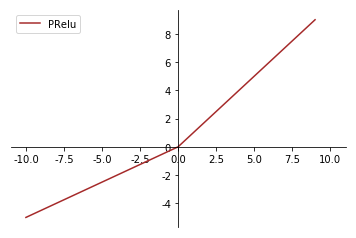

In [3]:
#     prelu
x = np.arange(-10,10)
a = np.array(x)
y = np.where(x<0,0.5*x,x)

plt.xlim(-11,11)
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))
plt.plot(x,y,label='PRelu',linestyle='-',color='brown')
plt.legend(['PRelu'])
# plt.savefig('PRelu.png',dpi=500) # Specified resolution

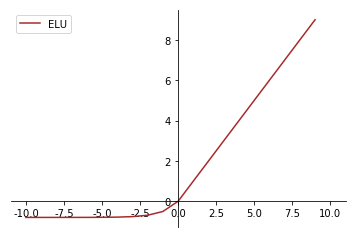

In [4]:
#     ELU
x = np.arange(-10,10)
a = np.array(x)
y = np.where(x<0,0.8*(math.e**(x)-1),x)

plt.xlim(-11,11)
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))
plt.plot(x,y,label='ELU',linestyle='-',color='brown')
plt.legend(['ELU'])
# plt.savefig('ELU.png',dpi=500) # Specified resolution

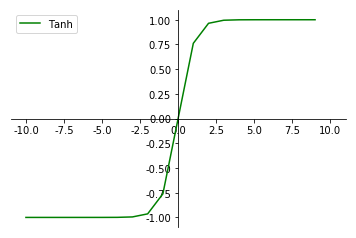

In [5]:
x = np.arange(-10,10)
a = np.array(x)
y = (math.e**(x) - math.e**(-x)) / (math.e**(x) + math.e**(-x))

plt.xlim(-11,11)
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))
plt.plot(x,y,label='Tanh',linestyle='-',color='green')
plt.legend(['Tanh'])
# plt.savefig('Tanh.png',dpi=500) # Specified resolution

In [6]:
def extract_features(S, sr):
    
    if S.shape[0] > 92585:
        S = S[:92585]
    else:
        S = np.pad(S, (0, 92585-S.shape[0]), 'constant')
    
    S_spectrogram = librosa.feature.melspectrogram(y=S, sr=sr, n_mels=128)  # spectrogram features
    S = librosa.power_to_db(S_spectrogram)
    S = scipy.fftpack.dct(S, axis=0, type=2, norm='ortho')[:12]  # MFCC features
    
    S_delta = librosa.feature.delta(S)
    S_delta2 = librosa.feature.delta(S, order=2)
    
    S = np.vstack([S_spectrogram, S_delta, S_delta2])     
    
    return S

hap_wav_vector, _sr = librosa.load('data/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_impro03/Ses01F_impro03_F000.wav', sr=16000)
hap = extract_features(hap_wav_vector, _sr)
# print (hap)